In [3]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 


# 데이터 불러오기 
iris = load_iris() 


#dataframe으로 변경 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
# print(iris_df) 
#타겟 추가 
#iris_df['species'] = iris.target 
#상황에 맞는 메뉴 있음 
iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
 

In [5]:
#kmeans
from sklearn.cluster import KMeans
# K-평균 군집화 알고리즘 모델 생성하기
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(iris_scaled)
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

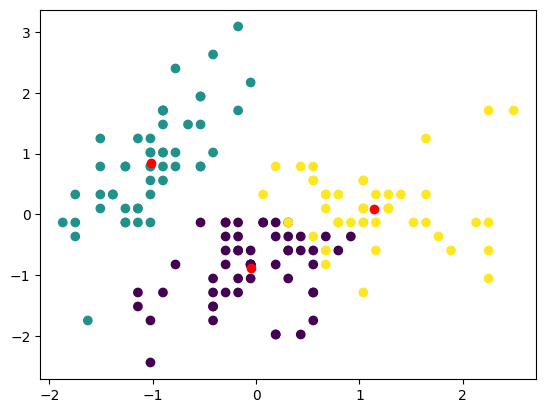

In [6]:
import matplotlib.pyplot as plt

plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_3)
#중심점

plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='red')

In [7]:
#실루엣 점수 계산

from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(iris_scaled,labels_3)
silhouette_avg

np.float64(0.45994823920518635)

In [8]:
# 개별 실루엣 점수
sample_silhouette_values = silhouette_samples(iris_scaled, labels_3)
sample_silhouette_values[:10]
 
# 클러스터별 평균 실루엣 점수 계산
unique_labels = set(labels_3)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_3 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)
   
 
# 결과 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')



Cluster 0: Average Silhouette Score = 0.39337721055814295
Cluster 1: Average Silhouette Score = 0.6363161744392947
Cluster 2: Average Silhouette Score = 0.3473922340262053


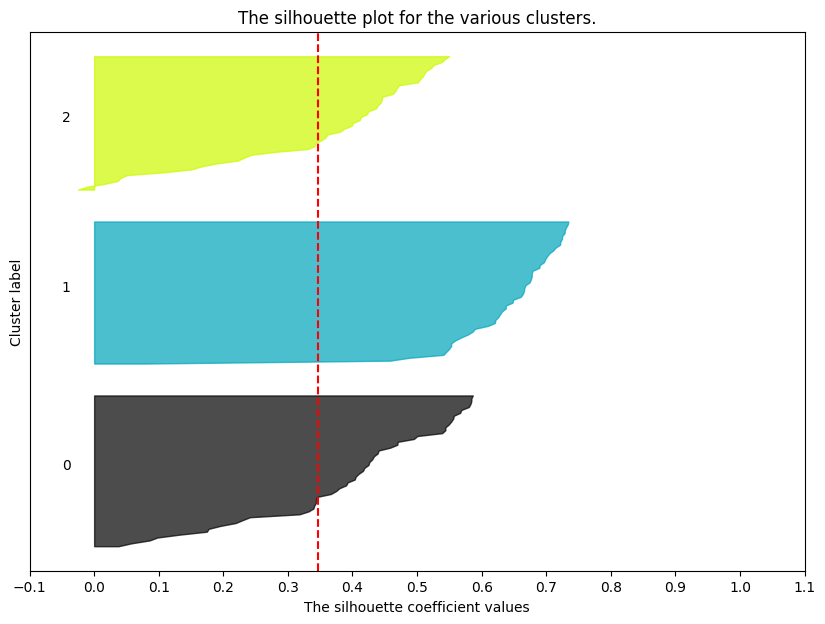

In [9]:
# 실루엣 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 7))
 
y_lower = 10
for i in range(3): #클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[labels_3 == i]
    ith_cluster_silhouette_values.sort()
   
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
 
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
 
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10  # 다음 클러스터로 이동
 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))
 
plt.show()

In [10]:
#pca해보기
# PCA 분석 
from sklearn.decomposition import PCA 
pca = PCA() 
iris_df_scaled=iris_scaled
pcomponents = pca.fit_transform(iris_df_scaled) 
pcomponents

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [11]:
# 각 성분별 설명력 조회 
exp_v = pca.explained_variance_ 
exp_v 

# 설명력을 비율로 조회 
exp_vratio = pca.explained_variance_ratio_ 
exp_vratio 

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [12]:
# 설명력을 비율로 조회 
exp_vratio = pca.explained_variance_ratio_ 
exp_vratio 

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [13]:
# 80~90% 성분이 담긴 성분 조회 
exp_vratio.cumsum() 

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

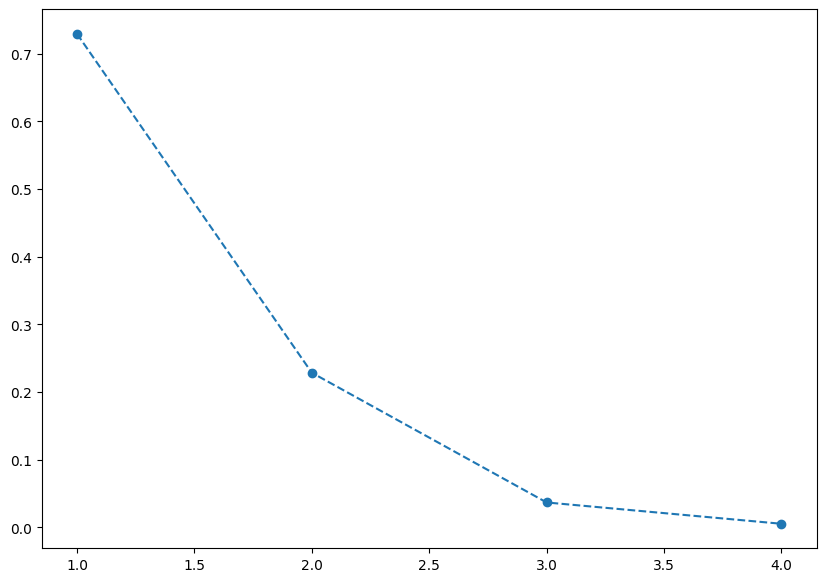

In [14]:
# scree plot 
plt.figure(figsize=(10, 7)) 
plt.plot(range(1, len(exp_vratio)+1), exp_vratio,marker='o', linestyle='--') 

In [15]:
pca2 = PCA(n_components=2) 
p_comp2 = pca2.fit_transform(iris_df_scaled) 
p_comp2_df = pd.DataFrame(data= p_comp2, columns=['PC1', 'PC2'])
p_comp2_df

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [16]:
iris_df['species']=iris.target

In [17]:
final_df = pd.concat([p_comp2_df, iris_df[['species']]],axis=1)
final_df

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


k=2, silhouette_score : 0.6145202036230452


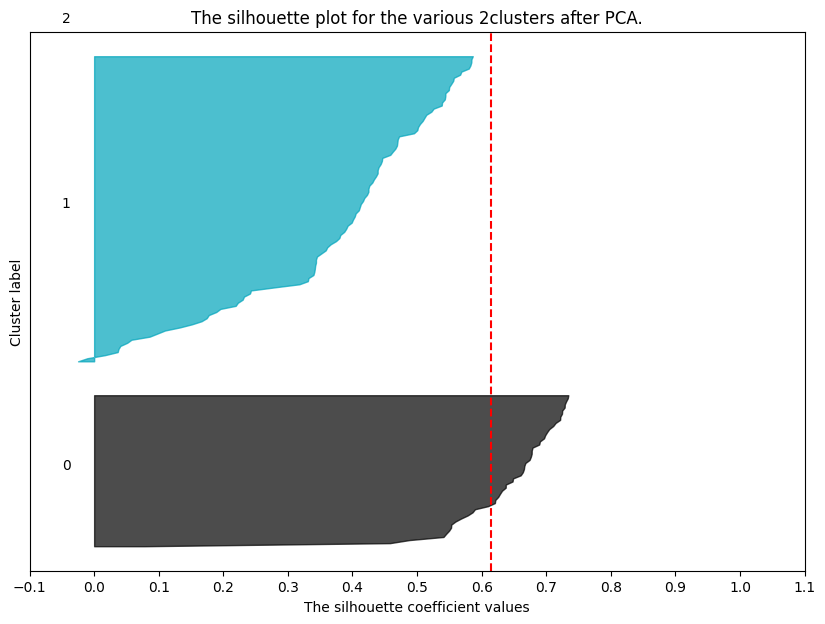

k=3, silhouette_score : 0.5091683341538227


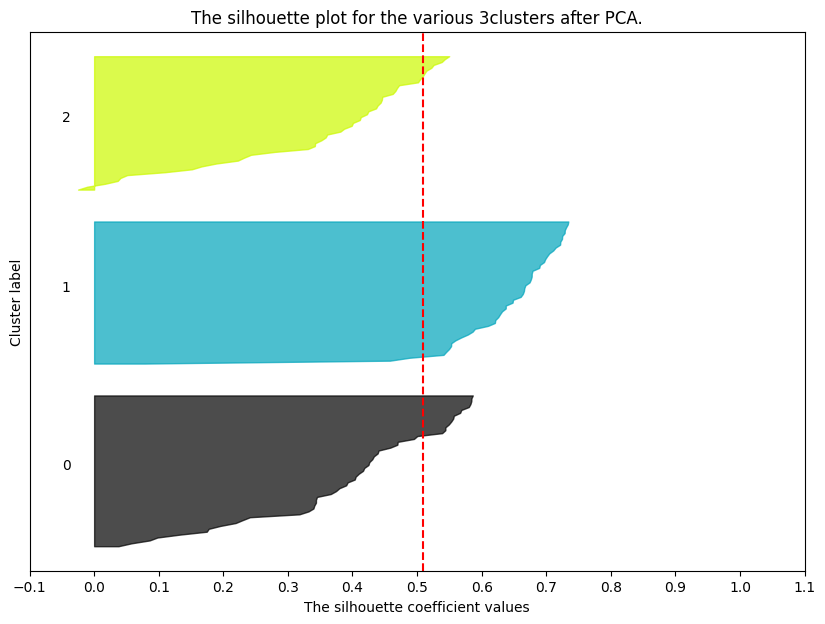

In [18]:
#k=3인 모형을 만들고 실루옛개수를 평가한다.
# k-means, k-3인 모델을 만들고, 실루엣계수 평가 

 

 

from sklearn.cluster import KMeans 

# K-평균 군집화 알고리즘 모델 생성하기 

k_means = [2,3] 

for k in k_means: 

    # K-평균 클러스터링 수행     
    pca_kmeans = KMeans(n_clusters=k, random_state=0) 
    cluster_labels = pca_kmeans.fit_predict(final_df[['PC1', 'PC2']]) 
    # 실루엣 점수 계산a 
    silhouette_values = silhouette_samples(final_df[['PC1', 'PC2']], cluster_labels) 
    # 전체 실루엣 점수 계산 
    silhouette_avg = silhouette_score(final_df[['PC1','PC2']], cluster_labels) 
    print(f'k={k}, silhouette_score : {silhouette_avg}') 
    # 실루엣 차트 그리기 
    fig, ax1 = plt.subplots(figsize=(10, 7)) 
    y_lower = 10 
    
    for i in range(3): #클러스터 3개 
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] 
        ith_cluster_silhouette_values.sort() 
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i 
        color = plt.cm.nipy_spectral(float(i) / 3) 
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 
                        0, ith_cluster_silhouette_values, 
                        facecolor=color, edgecolor=color, alpha=0.7) 

 

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 
        y_lower = y_upper + 10  # 다음 클러스터로 이동 

 

    ax1.set_title(f"The silhouette plot for the various {k}clusters after PCA.") 
    ax1.set_xlabel("The silhouette coefficient values") 
    ax1.set_ylabel("Cluster label") 


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
    ax1.set_yticks([]) 
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.1)) 


    plt.show() 

 